In [71]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [79]:
df= pd.read_csv("Income.csv")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [74]:
# Drop name columns 
df.drop(axis=1,columns="Name",inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


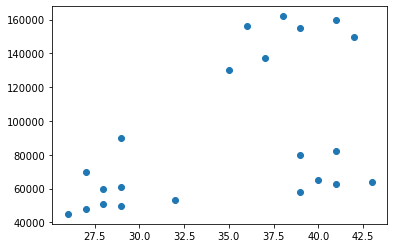

In [82]:
# visualize on scatter plot
plt.scatter(df["Age"],df["Income($)"])

In [83]:
# feature scaling on y axis
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df["Income($)"]= scaler.transform(df[["Income($)"]])
scaler.fit(df[['Age']])
df["Age"]= scaler.transform(df[["Age"]])
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [84]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [85]:
ypred= km.fit_predict(df[['Age','Income($)']])
ypred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [86]:
# visualize the array y to see the clusters
df['Clusters']=ypred
df.sample(16)

,Name,Age,Income($),Clusters
14,Stark,0.176471,0.038462,1
1,Michael,0.176471,0.384615,1
12,Arnold,0.058824,0.025641,1
5,Gautam,0.764706,0.940171,2
10,Donald,0.647059,0.786325,2
2,Mohan,0.176471,0.136752,1
0,Rob,0.058824,0.213675,1
8,Brad,0.588235,0.948718,2
11,Tom,0.000000,0.000000,1
3,Ismail,0.117647,0.128205,1


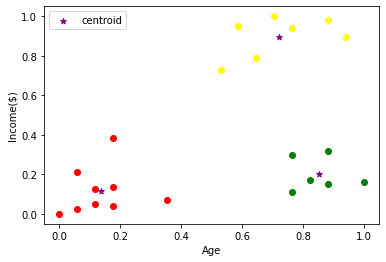

In [89]:
# separate clusters 
df1=df[df.Clusters==0]
df2=df[df.Clusters==1]
df3=df[df.Clusters==2]

plt.scatter(df1['Age'],df1['Income($)'],color="green")
plt.scatter(df2['Age'],df2['Income($)'],color="red")
plt.scatter(df3['Age'],df3['Income($)'],color="yellow")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [88]:
# centroids
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [90]:
# elbow method to find centroids
k_range = range(1,10)
sse = []
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [91]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.2155256331475538,
 0.1685851223602976,
 0.1397684499538816,
 0.10383752586603562]

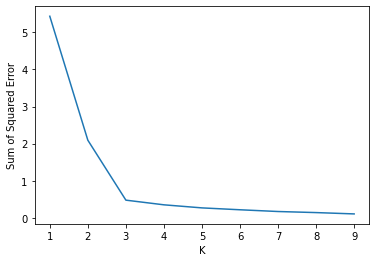

In [93]:
# plot the sse 
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range,sse)